# This is a the Test Simulation for TESS Asteroseismology Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

# TIC 7 Query
http://mastweb.stsci.edu/mcasjobs/

Context "TESS_v7".  The table called "catalogRecord" is the full TIC
```
SELECT TOP 10 id,tyc,gaia,ra,dec,gallong,gallat,eclong,eclat,Tmag,Hmag,Teff,lumClass FROM catalogRecord 
WHERE lumClass = 'GIANT' AND
Teff >= 3500 AND Teff <= 5800 AND
abs(eclat) > 64 AND
Tmag < 15
```

In [2]:
ver = 'beta-0'
rgb_tab = Table.read('workspace/target_files/RGB/{}/tic7giants.csv'.format(ver),format='ascii')
rgb_tab

id,tyc,gaia,ra,dec,gallong,gallat,eclong,eclat,Tmag,Hmag,Teff,RGB
int64,str12,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
313423505,3880-01418-1,null,240.147838,55.564645,86.315286,45.844332,203.416634,72.137332,8.66199970245361,7.14200019836426,4439.0,GIANT
417582403,3491-01033-1,1398431284174266368,240.665612,45.946484,72.565181,48.017287,218.428911,64.224788,11.0030002593994,9.89799976348877,5058.0,GIANT
159938957,null,1400414390834699648,240.199192,49.542363,77.901585,47.586372,213.561661,67.231784,13.043999671936,11.5369997024536,4412.0,GIANT
160161952,null,1724210394731615232,240.353715,84.56849,118.275963,30.720873,98.311014,71.100068,13.9259996414185,12.0819997787476,3903.0,GIANT
199526274,null,1641597214189515008,240.428353,64.192878,97.219588,42.215425,177.145136,77.577798,11.1230001449585,9.16100025177002,3797.0,GIANT
237100473,null,1646642769969611520,240.552979,68.324961,101.989017,40.165396,157.674247,78.679944,13.9890003204346,12.2849998474121,3963.0,GIANT
313424165,null,1621338815526525184,240.666135,54.990059,85.396755,45.759124,205.337638,71.881752,13.5579996109009,11.4919996261597,3669.07006835938,GIANT
159969414,null,1403858988965045504,240.705446,51.395908,80.419526,46.803743,211.677885,68.977265,14.3620004653931,12.8030004501343,4380.0,GIANT
160161914,null,1724021519249688064,240.52547,84.49305,118.19659,30.756998,98.412378,71.16996,13.3489999771118,12.2320003509521,5151.0,GIANT


# Star Selection Rules
- 250,000 total stars star H <= 11 get S/N 80 actually use 10.85 since that only needs two exposures at S/N 80 and 3  exposures at S/N 100
- H >= 7 to avoid saturation
- Randomly choose 80,000 as uncrowded stars that get S/N 100
- Start at ecliptic poles and work my way down.

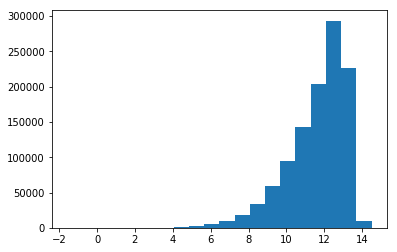

In [3]:
plt.hist(rgb_tab['Hmag'],20)
plt.show()

In [4]:
#Remove all dimmer stars and saturated stars
rgb_tab = rgb_tab[((rgb_tab['Hmag'] < 10.85) & (rgb_tab['Hmag'] > 7))]
print(len(rgb_tab))

270863


In [5]:
#Sort by Absolute ecliptic latitude and keep the top 250,000
absEclat = np.abs(rgb_tab['eclat'])
absEclat_ind = np.argsort(absEclat)[::-1]
rgb_tab = rgb_tab[absEclat_ind][0:250000]
rgb_tab

id,tyc,gaia,ra,dec,gallong,gallat,eclong,eclat,Tmag,Hmag,Teff,RGB
int64,str12,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
31604315,null,4659721757299580416,89.901385,-66.59297,276.421223,-29.850596,320.501996,-89.949231,11.7110004425049,9.94999980926514,4089.0,GIANT
31604390,8904-01315-1,4659722375774867968,89.837254,-66.532175,276.351194,-29.876257,23.699468,-89.92922,10.8109998703003,9.43400001525879,4715.0,GIANT
219098540,null,1633323079952249472,269.942356,66.629684,96.463509,29.834253,108.338266,89.927324,10.7760000228882,9.45400047302246,4729.0,GIANT
219098060,null,1633322564556175488,269.806436,66.602331,96.432153,29.888279,151.496538,89.912532,12.2480001449585,10.7799997329712,4514.0,GIANT
40976377,null,4659715469501120640,89.998836,-66.655927,276.493714,-29.811816,270.277485,-89.90478,12.2700004577637,10.5270004272461,4122.0,GIANT
219098087,null,1633309610934813312,269.766473,66.516496,96.333213,29.904504,205.325886,89.897048,12.1180000305176,10.2749996185303,3984.0,GIANT
219098111,null,1633306312399931136,269.774141,66.467461,96.276636,29.901612,225.908504,89.870397,11.7980003356934,10.2030000686646,4341.0,GIANT
219098013,4212-01100-1,1633326966898757504,269.800786,66.693419,96.537226,29.890115,120.683087,89.84554,10.3500003814697,8.95899963378906,4662.0,GIANT
31604539,8904-00730-1,4755801412661677184,89.921236,-66.388391,276.185349,-29.842908,79.62401,-89.824838,10.9689998626709,9.72599983215332,5493.0,GIANT


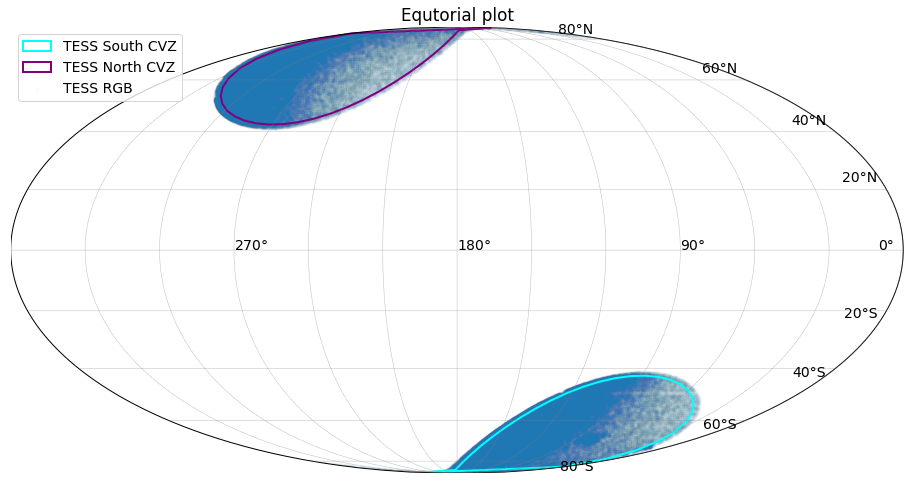

In [6]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_fk5()
#Plot Planet Targets
xplan,yplan = bmap(rgb_tab['ra'],rgb_tab['dec'])
bmap.scatter(xplan,yplan,marker='.',label='TESS RGB',alpha=.01)
plt.title("Equtorial plot")
plt.legend()
plt.show()

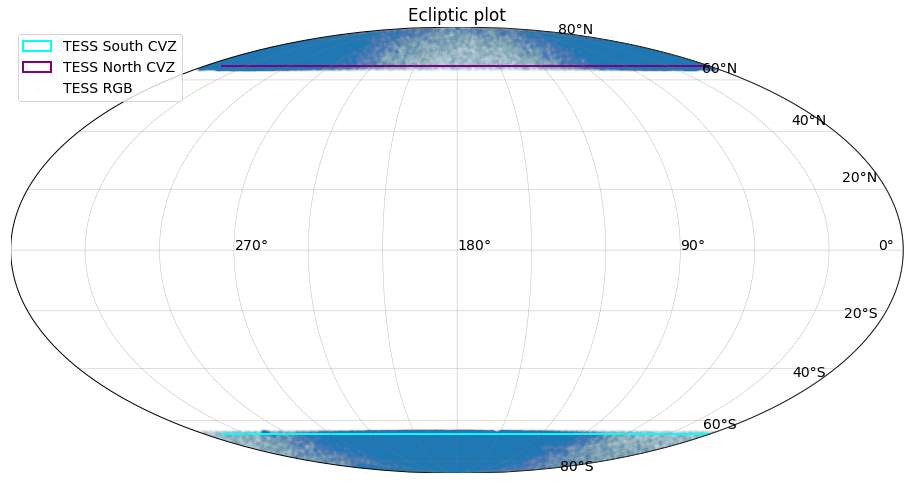

In [7]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_ecl()
#Plot Planet Targets
xplan,yplan = bmap(rgb_tab['eclong'],rgb_tab['eclat'])
bmap.scatter(xplan,yplan,marker='.',label='TESS RGB',alpha=.01)
plt.title("Ecliptic plot")
plt.legend()
plt.show()

## Create Target Table

In [8]:
target_tab = Table()

## Determine Cadence type

## Randomly select 80,000 stars as uncrowded
These stars get S/N 100

In [9]:
np.random.seed(100) #Seed the random number generator, so the result is always the same
sn100_ind = np.random.choice(np.arange(len(rgb_tab)),80000,replace=False)
print(sn100_ind)

[ 33735 206163  91303 ...  22065 156074 226469]


## Look at distribution of Exposures per Hmag for S/N 80

In [10]:
(bins, edges) = np.histogram(rgb_tab['Hmag'],bins=140,range=(-2,12))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp_80 = h2exp(mag_center,sn=80,exptime=15)
for i in np.arange(len(mag_center)):
    if i > 120:
        print("H Mag: {:.2f} Num Exp: {} Num Stars: {} Total Stars: {}".format(mag_center[i],numexp_80[i]
                                                                           ,bins[i],np.sum(bins[:i+1])))

H Mag: 10.15 Num Exp: 1.0 Num Stars: 11372 Total Stars: 160787
H Mag: 10.25 Num Exp: 1.0 Num Stars: 11782 Total Stars: 172569
H Mag: 10.35 Num Exp: 1.0 Num Stars: 12724 Total Stars: 185293
H Mag: 10.45 Num Exp: 2.0 Num Stars: 12960 Total Stars: 198253
H Mag: 10.55 Num Exp: 2.0 Num Stars: 13837 Total Stars: 212090
H Mag: 10.65 Num Exp: 2.0 Num Stars: 14825 Total Stars: 226915
H Mag: 10.75 Num Exp: 2.0 Num Stars: 15125 Total Stars: 242040
H Mag: 10.85 Num Exp: 2.0 Num Stars: 7960 Total Stars: 250000
H Mag: 10.95 Num Exp: 2.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.05 Num Exp: 3.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.15 Num Exp: 3.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.25 Num Exp: 3.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.35 Num Exp: 4.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.45 Num Exp: 4.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.55 Num Exp: 4.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.65 Num Exp: 5.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.75 Num Exp: 5.0

## Max Hmag is 10.95, so max exposures = 2 for S/N 80

10.8489999771118
2.0


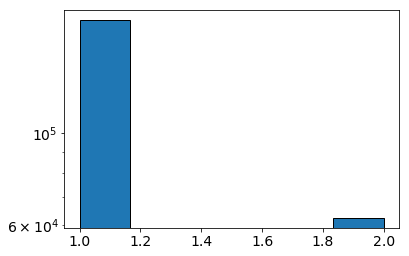

In [11]:
numexp_80 = h2exp(rgb_tab['Hmag'],sn=80) #Generate number of exposures for each star based on Hmag
print(np.max(rgb_tab['Hmag']))
print(np.max(numexp_80))
plt.hist(numexp_80,bins=6,log=True,edgecolor='black')
plt.show()

## Look at distribution of Exposures per Hmag for S/N 100

In [12]:
(bins, edges) = np.histogram(rgb_tab['Hmag'],bins=140,range=(-2.0,12.0))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp_100 = h2exp(mag_center,sn=100,exptime=15)
for i in np.arange(len(mag_center)):
    if i > 120:
        print("H Mag: {:.2f} Num Exp: {} Num Stars: {} Total Stars: {}".format(mag_center[i],numexp_100[i]
                                                                           ,bins[i],np.sum(bins[:i+1])))

H Mag: 10.15 Num Exp: 2.0 Num Stars: 11372 Total Stars: 160787
H Mag: 10.25 Num Exp: 2.0 Num Stars: 11782 Total Stars: 172569
H Mag: 10.35 Num Exp: 2.0 Num Stars: 12724 Total Stars: 185293
H Mag: 10.45 Num Exp: 2.0 Num Stars: 12960 Total Stars: 198253
H Mag: 10.55 Num Exp: 3.0 Num Stars: 13837 Total Stars: 212090
H Mag: 10.65 Num Exp: 3.0 Num Stars: 14825 Total Stars: 226915
H Mag: 10.75 Num Exp: 3.0 Num Stars: 15125 Total Stars: 242040
H Mag: 10.85 Num Exp: 3.0 Num Stars: 7960 Total Stars: 250000
H Mag: 10.95 Num Exp: 4.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.05 Num Exp: 4.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.15 Num Exp: 5.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.25 Num Exp: 5.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.35 Num Exp: 6.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.45 Num Exp: 6.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.55 Num Exp: 7.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.65 Num Exp: 7.0 Num Stars: 0 Total Stars: 250000
H Mag: 11.75 Num Exp: 8.0

10.8489999771118
3.0


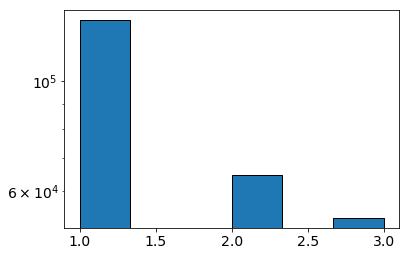

In [13]:
numexp_100 = h2exp(rgb_tab['Hmag'],sn=100) #Generate number of exposures for each star based on Hmag
print(np.max(rgb_tab['Hmag']))
print(np.max(numexp_100))
plt.hist(numexp_100,bins=6,log=True,edgecolor='black')
plt.show()

## Create unified numexp list

In [14]:
numexp = numexp_80
numexp[sn100_ind] = numexp_100[sn100_ind]
print("Total Requested Exposures: {}".format(np.sum(numexp)))

Total Requested Exposures: 347098.0


In [15]:
cadence_list = ["mwm_tess_rgb_{:.0f}x1".format(num) for num in numexp]
print(cadence_list[0:40])

['mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_3x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_3x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_2x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_3x1', 'mwm_tess_rgb_1x1', 'mwm_tess_rgb_1x1']


In [16]:
type_list = np.repeat('mwm_tess_rgb_80 ',len(rgb_tab))
type_list[sn100_ind] = 'mwm_tess_rgb_100'
print(type_list[0:40])

['mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100'
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_100' 'mwm_tess_rgb_100' 'mwm_tess_rgb_100'
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100' 'mwm_tess_rgb_100'
 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100'
 'mwm_tess_rgb_80 ' 'mwm_tess_rgb_100' 'mwm_tess_rgb_80 '
 'mwm_tess_rgb_100']


In [17]:
target_tab['ra'] = rgb_tab['ra']
target_tab['dec'] = rgb_tab['dec']
target_tab['cadence'] = cadence_list
target_tab['type'] = type_list
target_tab['priority'] = np.repeat(np.array(85,dtype='int32'),len(rgb_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(rgb_tab))

In [18]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str16,str16,int32,float32
89.901385,-66.59297,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
89.837254,-66.532175,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
269.942356,66.629684,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
269.806436,66.602331,mwm_tess_rgb_3x1,mwm_tess_rgb_100,85,1.0
89.998836,-66.655927,mwm_tess_rgb_2x1,mwm_tess_rgb_80,85,1.0
269.766473,66.516496,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
269.774141,66.467461,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
269.800786,66.693419,mwm_tess_rgb_1x1,mwm_tess_rgb_80,85,1.0
89.921236,-66.388391,mwm_tess_rgb_1x1,mwm_tess_rgb_100,85,1.0


In [19]:
target_tab.write('{}/mwm_tess_rgb_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
Following APOGEE cadences, the following are the optimal difference in days
```
[0]
[0,26]
[0,3,26]
```

In [20]:
cadence_tab = Table()

In [21]:
cadence_list_uniq = np.unique(cadence_list)
print(cadence_list_uniq)

['mwm_tess_rgb_1x1' 'mwm_tess_rgb_2x1' 'mwm_tess_rgb_3x1']


In [22]:
numexp_uniq = np.unique(numexp)
print(numexp_uniq)

[1. 2. 3.]


In [23]:
cadence_tab['cadence'] = cadence_list_uniq
cadence_tab['nepochs'] = np.array(numexp_uniq,dtype='int32')
cadence_tab

cadence,nepochs
str16,int32
mwm_tess_rgb_1x1,1
mwm_tess_rgb_2x1,2
mwm_tess_rgb_3x1,3


In [24]:
delta = np.array([[0,np.nan,np.nan],[0,26,np.nan],[0,3,26]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0. nan nan]
 [ 0. 26. nan]
 [ 0.  3. 26.]]


In [25]:
delta_min = np.array([[0,np.nan,np.nan],[0,26,np.nan],[0,3,26]],dtype='float32')
print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0. nan nan]
 [ 0. 26. nan]
 [ 0.  3. 26.]]


In [26]:
delta_max = np.array([[0,np.nan,np.nan],[0,3000,np.nan],[0,3000,3000]],dtype='float32')
print(delta_max)
cadence_tab['delta_max'] = delta_max

[[   0.   nan   nan]
 [   0. 3000.   nan]
 [   0. 3000. 3000.]]


In [27]:
lunation = np.array([[1,np.nan,np.nan],[1,1,np.nan],[1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 1. nan nan]
 [ 1.  1. nan]
 [ 1.  1.  1.]]


In [28]:
instrument = np.array([['apogee',np.nan,np.nan],
                       ['apogee','apogee',np.nan],
                       ['apogee','apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'nan' 'nan']
 ['apogee' 'apogee' 'nan']
 ['apogee' 'apogee' 'apogee']]


In [29]:
cadence_tab

cadence,nepochs,delta [3],delta_min [3],delta_max [3],lunation [3],instrument [3]
str16,int32,float32,float32,float32,float32,str6
mwm_tess_rgb_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_rgb_2x1,2,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_rgb_3x1,3,0.0 .. 26.0,0.0 .. 26.0,0.0 .. 3000.0,1.0 .. 1.0,apogee .. apogee


In [30]:
cadence_tab.write('{}/mwm_tess_rgb_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [31]:
test =  Table.read('{}/mwm_tess_rgb_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [3],delta_min [3],delta_max [3],lunation [3],instrument [3]
bytes16,int32,float32,float32,float32,float32,bytes24
mwm_tess_rgb_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_rgb_2x1,2,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_rgb_3x1,3,0.0 .. 26.0,0.0 .. 26.0,0.0 .. 3000.0,1.0 .. 1.0,apogee .. apogee
